# Question 2. Clustering with k-means and validation by Silhouette value

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
from yellowbrick.cluster import SilhouetteVisualizer

In [3]:
# Load dataset
df = pd.read_csv('IMDB-Movies.csv')

## EDA

In [4]:
df.head()

,Unnamed: 0,Title,Genre,Description,Director,Actors,Year,Runtime..Minutes.,Rating,Votes,Revenue..Millions.
0,1,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32
1,2,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57
2,3,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15
3,4,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99
4,5,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68


In [5]:
df.describe()

,Unnamed: 0,Year,Runtime..Minutes.,Rating,Votes,Revenue..Millions.
count,50.00000,50.000000,50.000000,50.000000,5.000000e+01,47.000000
mean,25.50000,2011.880000,133.240000,8.296000,5.123684e+05,157.811702
std,14.57738,3.342002,22.508556,0.217556,4.115784e+05,195.100478
min,1.00000,2006.000000,91.000000,8.100000,6.100000e+01,0.610000
25%,13.25000,2009.000000,118.000000,8.100000,1.971372e+05,13.415000
50%,25.50000,2012.000000,132.500000,8.200000,4.682900e+05,74.270000
75%,37.75000,2015.000000,150.500000,8.400000,7.483562e+05,205.900000
max,50.00000,2016.000000,180.000000,9.000000,1.791916e+06,936.630000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          50 non-null     int64  
 1   Title               50 non-null     object 
 2   Genre               50 non-null     object 
 3   Description         50 non-null     object 
 4   Director            50 non-null     object 
 5   Actors              50 non-null     object 
 6   Year                50 non-null     int64  
 7   Runtime..Minutes.   50 non-null     int64  
 8   Rating              50 non-null     float64
 9   Votes               50 non-null     int64  
 10  Revenue..Millions.  47 non-null     float64
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ KB


In [7]:
df.isna().sum()

Unnamed: 0            0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime..Minutes.     0
Rating                0
Votes                 0
Revenue..Millions.    3
dtype: int64

In [8]:
# Check the rows with missing values
df.loc[df.isnull().any(axis=1)]

,Unnamed: 0,Title,Genre,Description,Director,Actors,Year,Runtime..Minutes.,Rating,Votes,Revenue..Millions.
15,16,Koe no katachi,"Animation,Drama,Romance","The story revolves around Nishimiya Shoko, a g...",Naoko Yamada,"Miyu Irino, Saori Hayami, Aoi Yuki, Kenshô Ono",2016,129,8.4,2421,NaN
20,21,Paint It Black,Drama,A young woman attempts to deal with the death ...,Amber Tamblyn,"Alia Shawkat, Nancy Kwan, Annabelle Attanasio,...",2016,96,8.3,61,NaN
47,48,Twin Peaks: The Missing Pieces,"Drama,Horror,Mystery",Twin Peaks before Twin Peaks (1990) and at the...,David Lynch,"Chris Isaak, Kiefer Sutherland, C.H. Evans, Sa...",2014,91,8.1,1973,NaN


In [9]:
df1 = df.dropna()

In [10]:
df1.isna().sum()

Unnamed: 0            0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime..Minutes.     0
Rating                0
Votes                 0
Revenue..Millions.    0
dtype: int64

In [11]:
# Select numeric features to use for k-means clustering (exept year column):
numeric_features = df1[['Runtime..Minutes.', 'Rating', 'Votes', 'Revenue..Millions.']]

In [12]:
# # Standardize the numeric features
# scaler = StandardScaler()
# scaler.fit(numeric_features)
# scaled_data = scaler.transform(numeric_features)

In [13]:
# Standardize the numeric features
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(numeric_features.values), columns=numeric_features.columns, index=numeric_features.index)

In [14]:
scaled_data.head()

,Runtime..Minutes.,Rating,Votes,Revenue..Millions.
0,0.794084,3.195012,3.128294,1.945500
1,0.607006,2.284917,2.605737,0.698180
2,1.215008,2.284917,-1.244378,-0.759851
3,1.589163,1.374823,1.261337,0.156353
4,-1.357306,1.374823,-1.281656,-0.793372


## Find the best k with the Elbow method

In [15]:
# Determine optimal cluster number with elbow method
wcss = []

for i in range(2, 12):
    model = KMeans(
        n_clusters=i,
        init='k-means++',
        n_init=20,
        max_iter=400,
        random_state=45
    )
    model.fit(scaled_data)

    wcss.append(model.inertia_)

wcss


[130.23570084118322,
 97.99044855375882,
 81.22685907975875,
 66.63241449623453,
 52.532968082437435,
 40.86810614686155,
 35.46435500537987,
 30.014387401241393,
 27.62240376867474,
 25.250282326159095]

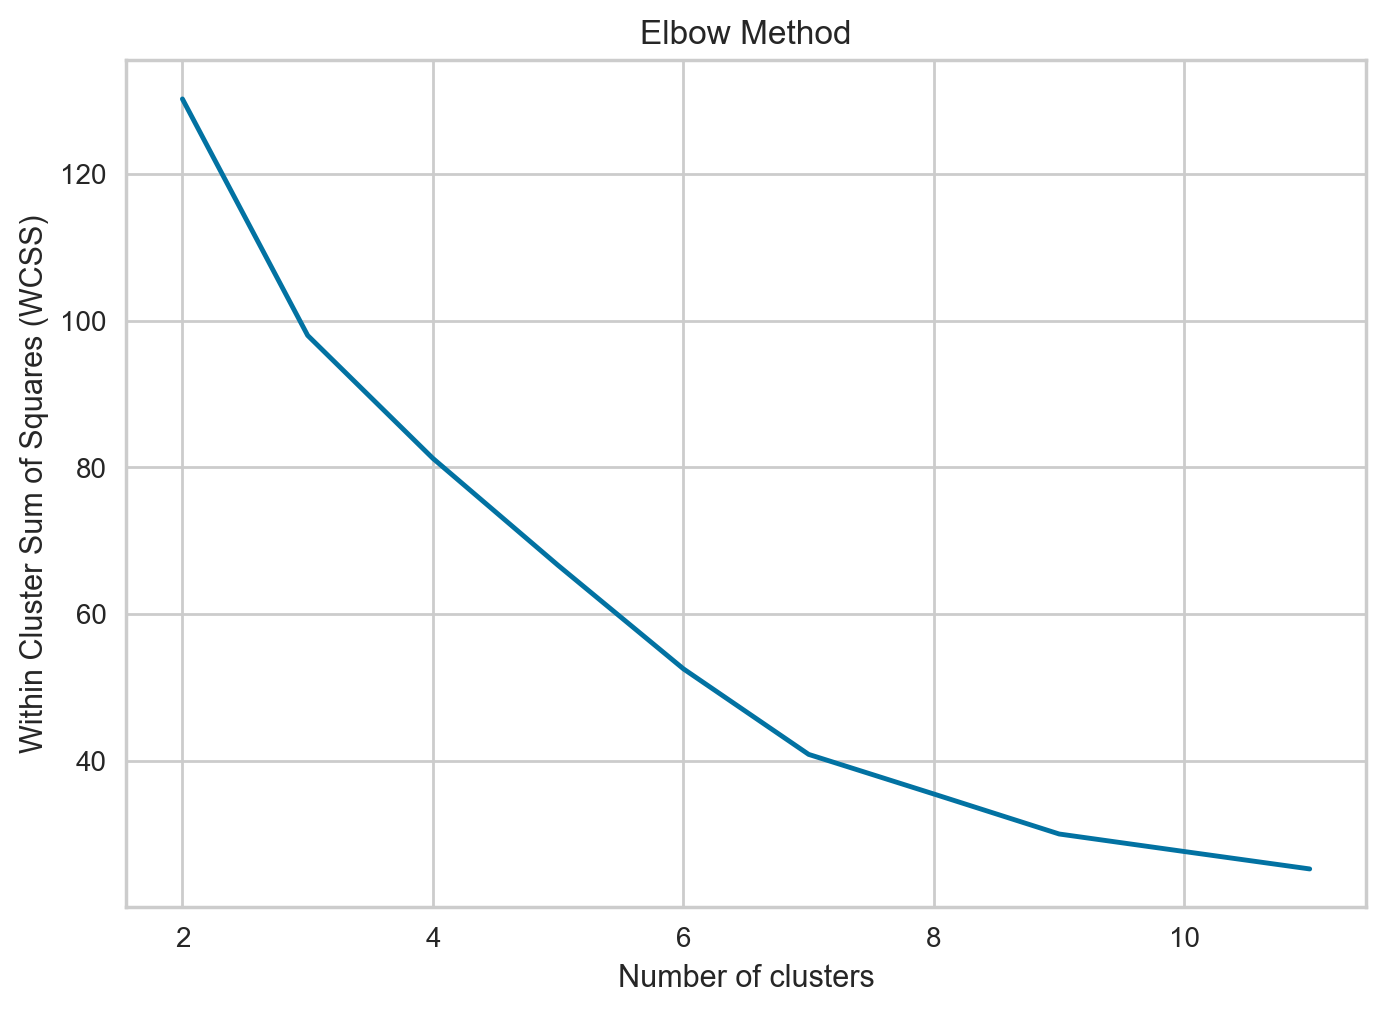

In [16]:
# Show Elbow plot
plt.plot(range(2, 12), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

### Fit the model with the best k

In [17]:
# Based on the elbow method, we can choose 3 as the best k 
# Fit the final model with k = 3
kmeans_model = KMeans(
    n_clusters=3,
    max_iter=300,
    n_init=20,
    random_state=345
)

kmeans_model.fit(scaled_data)

pred_y = kmeans_model.fit_predict(scaled_data)

In [18]:
result = scaled_data.copy()
result['cluster'] = kmeans_model.labels_
result.head()

,Runtime..Minutes.,Rating,Votes,Revenue..Millions.,cluster
0,0.794084,3.195012,3.128294,1.945500,1
1,0.607006,2.284917,2.605737,0.698180,1
2,1.215008,2.284917,-1.244378,-0.759851,0
3,1.589163,1.374823,1.261337,0.156353,1
4,-1.357306,1.374823,-1.281656,-0.793372,0


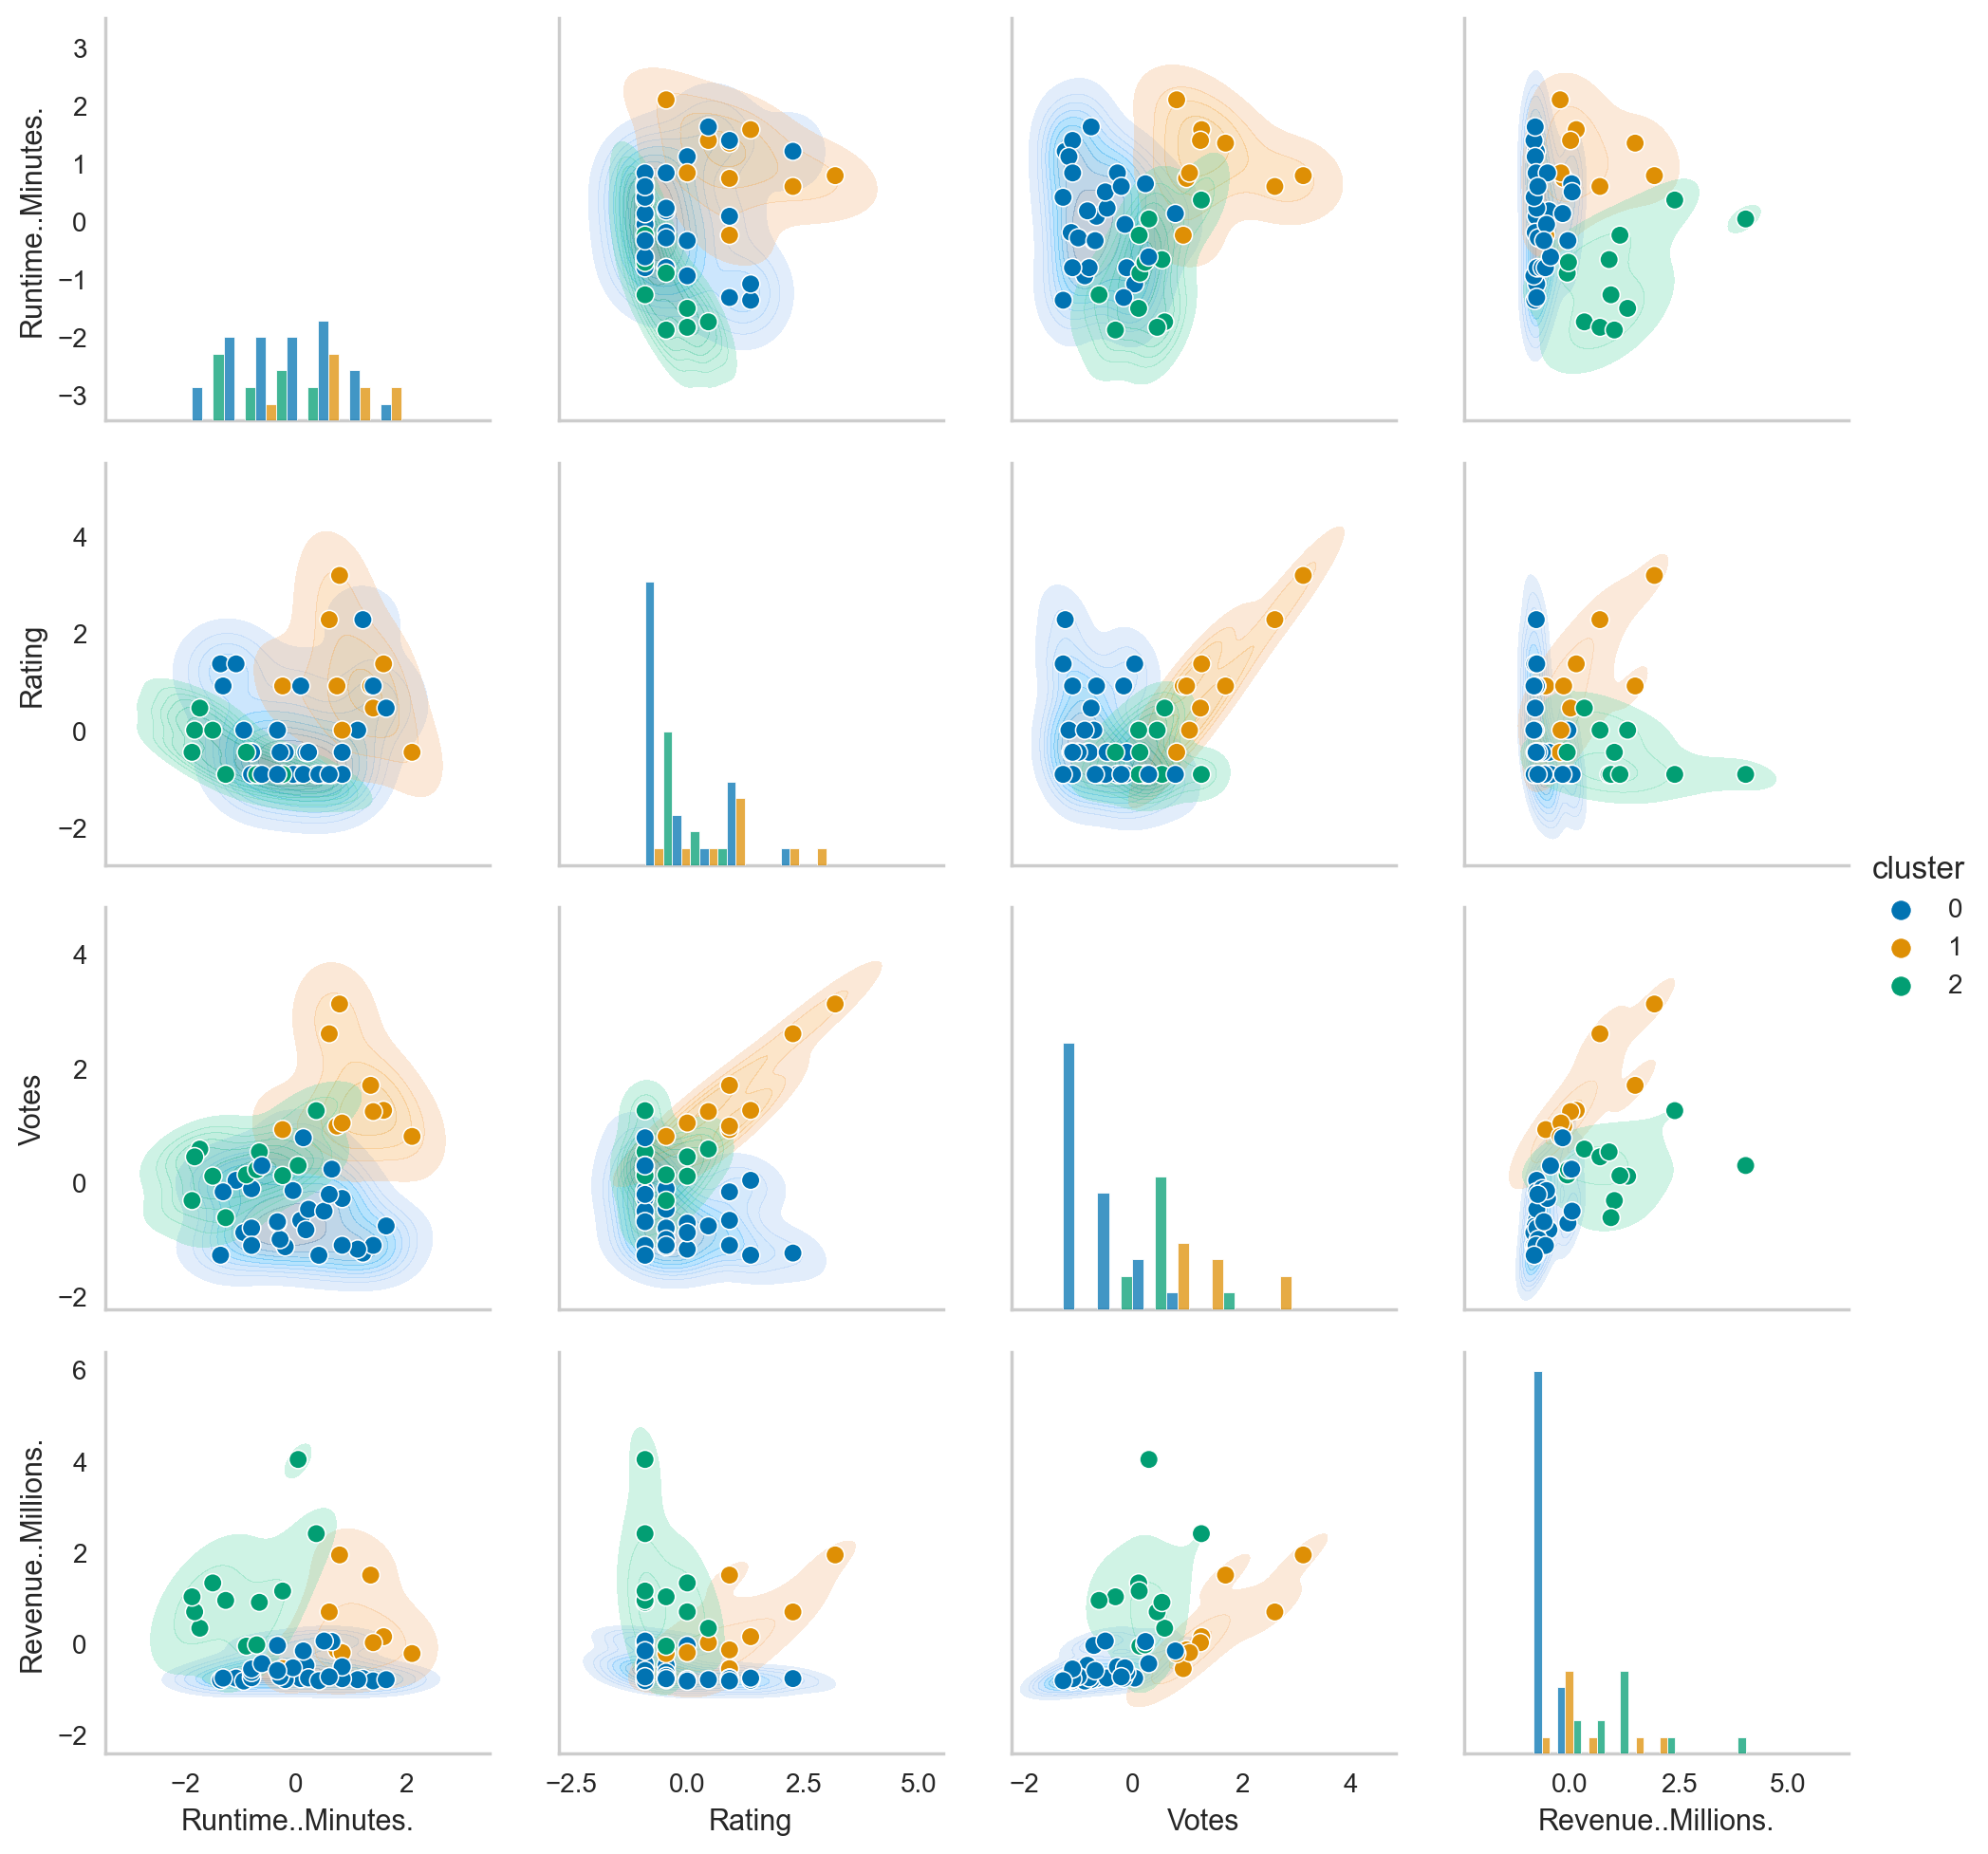

In [19]:
sns.set_style("whitegrid", {'axes.grid' : False})

# Visualise the clusters
final = sns.PairGrid(result, hue='cluster', palette='colorblind')
final.map_diag(sns.histplot, multiple='dodge')
final.map_offdiag(sns.kdeplot, alpha=.3, fill=True)
final.map_offdiag(sns.scatterplot)
final.add_legend()

In [20]:
# Table of centroids in each pair
features = kmeans_model.feature_names_in_
centroid = kmeans_model.cluster_centers_
pd.DataFrame(centroid, columns=features)

,Runtime..Minutes.,Rating,Votes,Revenue..Millions.
0,0.038845,-0.142001,-0.607966,-0.594204
1,1.022734,1.071458,1.520603,0.361140
2,-0.932130,-0.528101,0.248150,1.163022


## Validate the clustering result via silhouette value

Text(0.5, 0.98, 'Silhouette Plot for KMeans Clustering')

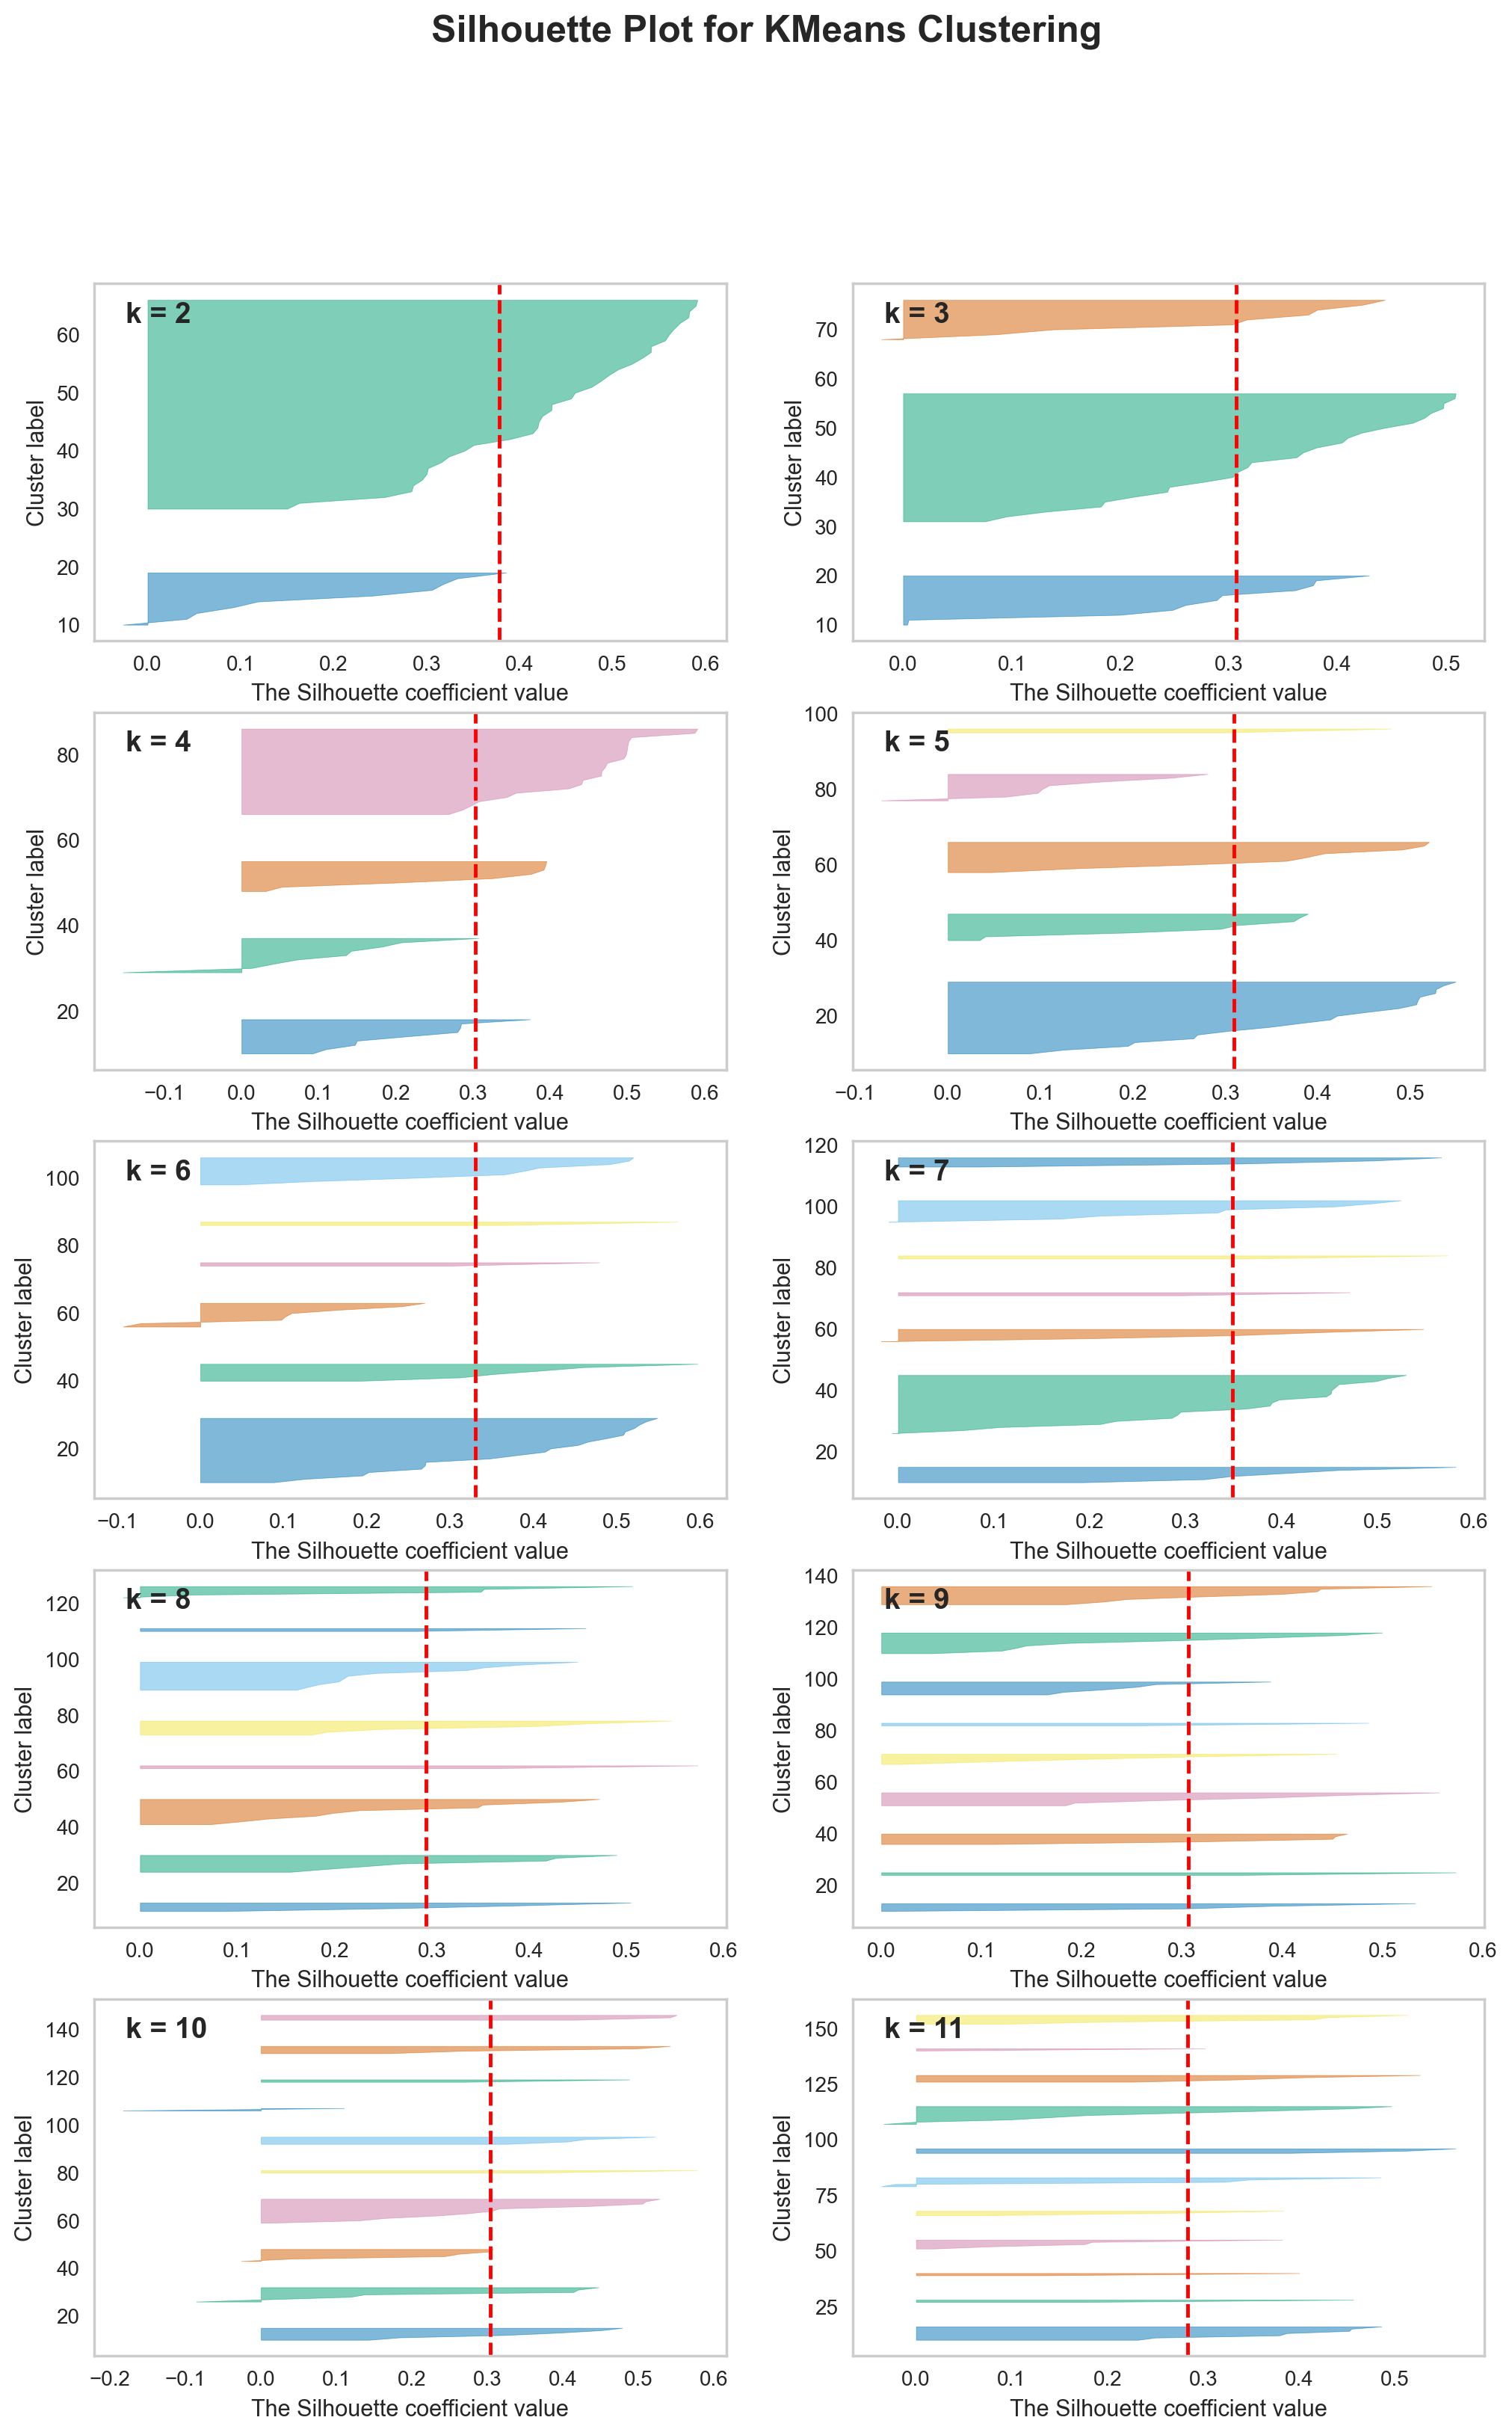

In [21]:
# Silhouette coefficient value for each k
fig, ax = plt.subplots(5, 2, figsize=(12, 18))
for i, ax_row in enumerate(ax):
    for j, axes in enumerate(ax_row):
        n_clusters = i * 2 + j + 2  # calculate the number of clusters for this plot
        km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=20, max_iter=300, random_state=198)
        visualizer = SilhouetteVisualizer(km, colors='colorblind', ax=axes)
        visualizer.fit(scaled_data)
        visualizer.ax.set_xlabel("The Silhouette coefficient value")
        visualizer.ax.set_ylabel("Cluster label")
        # Add the number of clusters as a text label to the plot
        axes.text(0.05, 0.95, f'k = {n_clusters}', transform=axes.transAxes,
                  fontsize=14, fontweight='bold', va='top')

#Add a title to the plot
fig.suptitle("Silhouette Plot for KMeans Clustering", fontsize=18, fontweight='bold')

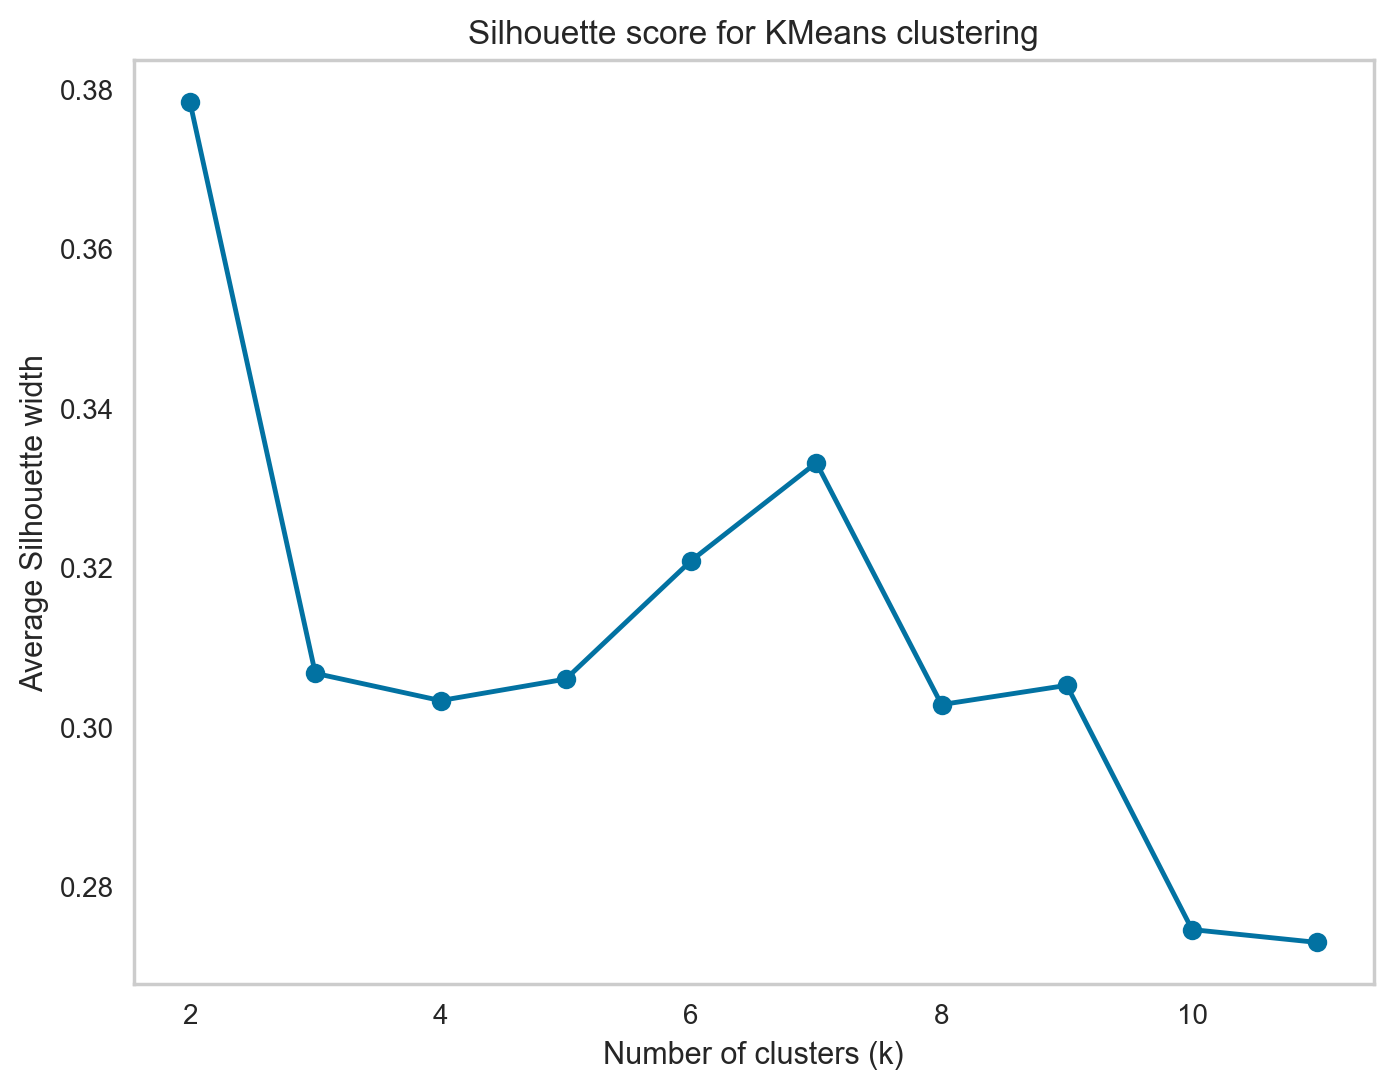

In [22]:
silhouette_scores = []
for i in range(2, 12):
    #Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=20, max_iter=300, random_state=150)
    #Fit the KMeans model to the data
    km.fit(scaled_data)
    #Calculate the Silhouette score for the KMeans model and append to the silhouette_scores list
    score = silhouette_score(scaled_data, km.labels_)
    silhouette_scores.append(score)
    
sns.set_style("whitegrid", {'axes.grid' : False})

#Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 12), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette width')
plt.title('Silhouette score for KMeans clustering')
plt.show()


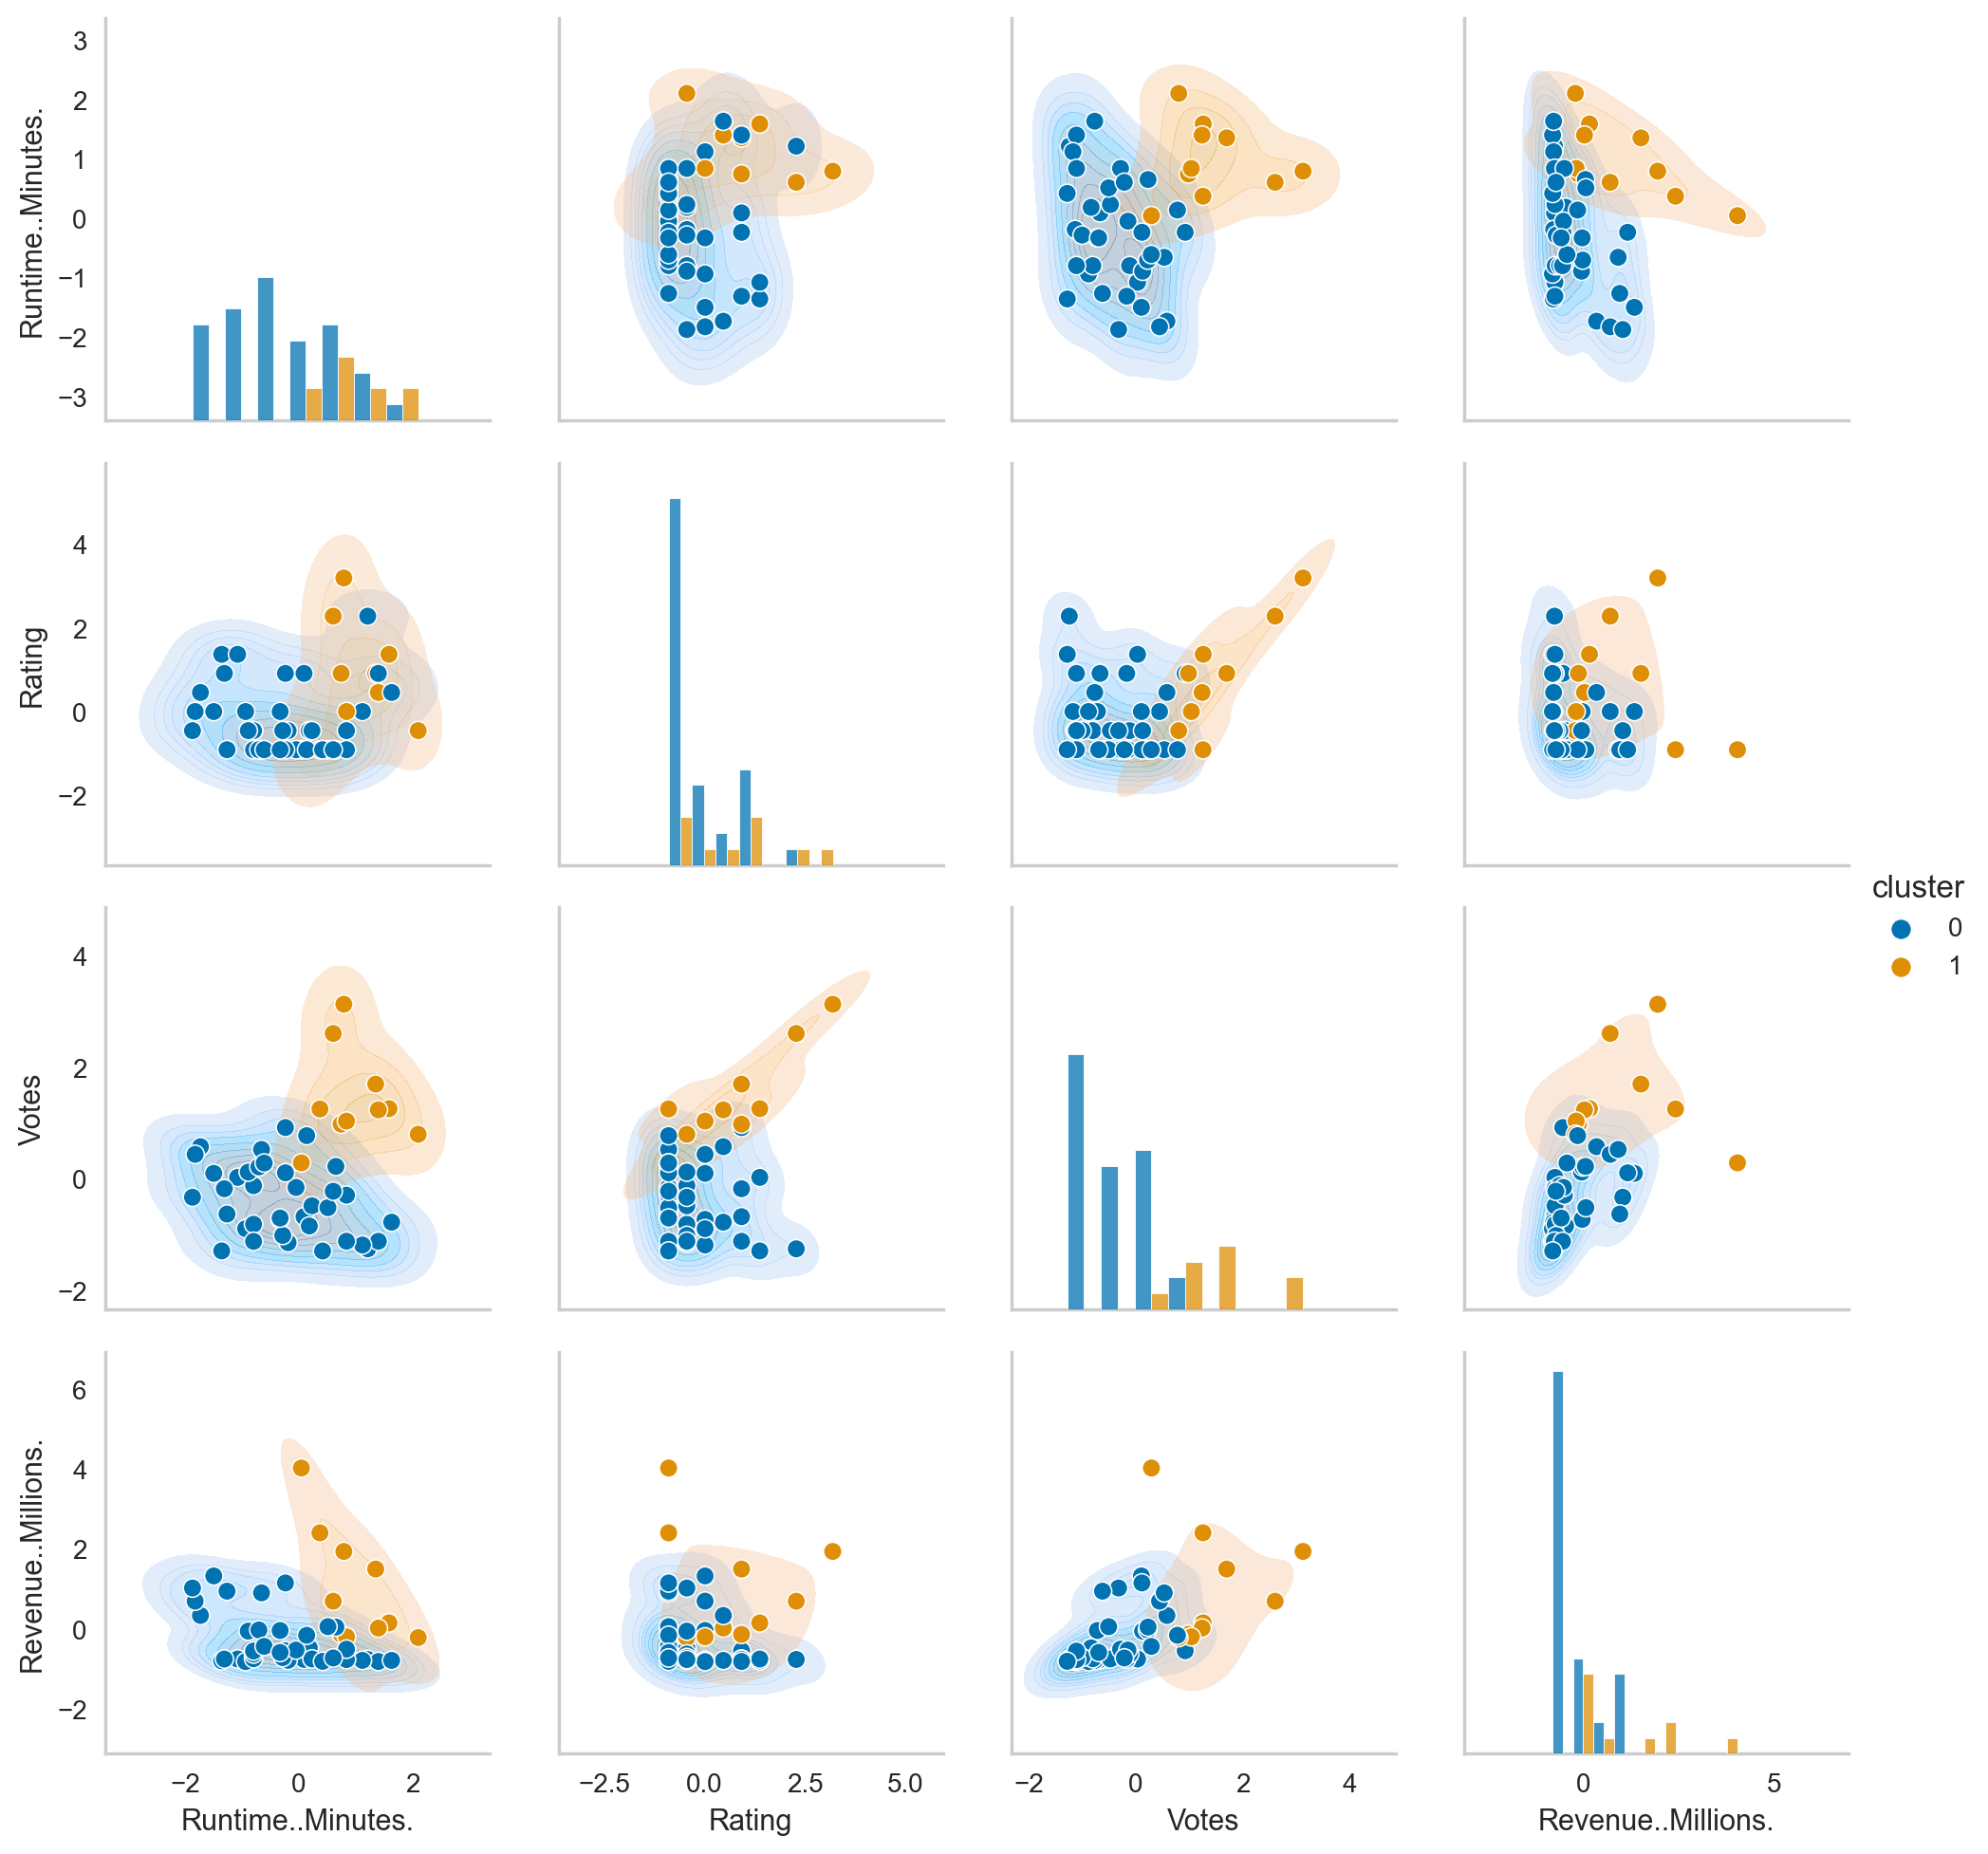

In [23]:
# Based on the silhouette score, we should choose k = 2
# Refit the kmeans clustering with k = 2 and visualise 
kmeans_model_sil = KMeans(
    n_clusters=2,
    max_iter=300,
    n_init=20,
    random_state=345
)

kmeans_model_sil.fit(scaled_data)

result_sil = scaled_data.copy()
result_sil['cluster'] = kmeans_model_sil.labels_

sns.set_style("whitegrid", {'axes.grid' : False})

# Visualise the clusters
final = sns.PairGrid(result_sil, hue='cluster', palette='colorblind')
final.map_diag(sns.histplot, multiple='dodge')
final.map_offdiag(sns.kdeplot, alpha=.3, fill=True)
final.map_offdiag(sns.scatterplot)
final.add_legend()

In [24]:
# Table of centroids in each pair
features_sil = kmeans_model_sil.feature_names_in_
centroid_sil = kmeans_model_sil.cluster_centers_
pd.DataFrame(centroid_sil, columns=features_sil)

,Runtime..Minutes.,Rating,Votes,Revenue..Millions.
0,-0.266443,-0.187095,-0.386764,-0.276743
1,0.985838,0.692253,1.431028,1.023949


In [26]:
result_sil.query('cluster == 1')

,Runtime..Minutes.,Rating,Votes,Revenue..Millions.,cluster
0,0.794084,3.195012,3.128294,1.945500,1
1,0.607006,2.284917,2.605737,0.698180,1
3,1.589163,1.374823,1.261337,0.156353,1
7,0.747314,0.919776,0.984536,-0.131813,1
8,1.355316,0.919776,1.700118,1.504132,1
12,1.402085,0.464729,1.239681,0.025844,1
18,0.840853,0.009682,1.038853,-0.193207,1
24,2.103625,-0.445365,0.803201,-0.212118,1
35,0.045774,-0.900412,0.292599,4.035040,1
38,0.373160,-0.900412,1.255921,2.411581,1


In [27]:
df1['cluster'] = kmeans_model_sil.labels_
df1.query('cluster ==1')

/var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/ipykernel_17233/3954174272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster'] = kmeans_model_sil.labels_


,Unnamed: 0,Title,Genre,Description,Director,Actors,Year,Runtime..Minutes.,Rating,Votes,Revenue..Millions.,cluster
0,1,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,1
1,2,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,1
3,4,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,1
7,8,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,1
8,9,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,1
12,13,Django Unchained,"Drama,Western","With the help of a German bounty hunter , a fr...",Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",2012,165,8.4,1039115,162.80,1
18,19,Inglourious Basterds,"Adventure,Drama,War","In Nazi-occupied France during World War II, a...",Quentin Tarantino,"Brad Pitt, Diane Kruger, Eli Roth,Mélanie Laurent",2009,153,8.3,959065,120.52,1
24,25,The Wolf of Wall Street,"Biography,Comedy,Crime","Based on the true story of Jordan Belfort, fro...",Martin Scorsese,"Leonardo DiCaprio, Jonah Hill, Margot Robbie,M...",2013,180,8.2,865134,116.87,1
35,36,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,1
38,39,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,1


In [28]:
df1.query('cluster == 0')

,Unnamed: 0,Title,Genre,Description,Director,Actors,Year,Runtime..Minutes.,Rating,Votes,Revenue..Millions.,cluster
2,3,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,0
4,5,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,0
5,6,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,0
6,7,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,0
9,10,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,0
10,11,The Lives of Others,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,0
11,12,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,0
13,14,3 Idiots,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,0
14,15,WALL·E,"Animation,Adventure,Family","In the distant future, a small waste-collectin...",Andrew Stanton,"Ben Burtt, Elissa Knight, Jeff Garlin, Fred Wi...",2008,98,8.4,776897,223.81,0
16,17,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,0
